<a href="https://colab.research.google.com/github/pGaldino25/algoritmo_aglomeracao/blob/pGaldino25%2Fmain/modelo_whole_sale_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados carregados e colunas irrelevantes removidas.
Dados pré-processados.
KMeans aplicado com 5 clusters.
Dados agrupados por clusters.


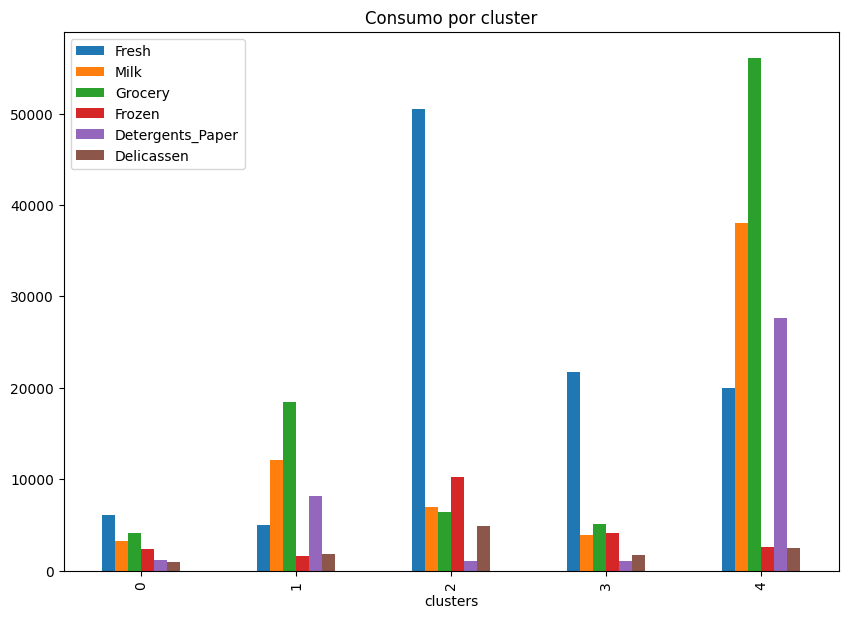

Gráfico gerado.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class ClusterAnalysis:
    def __init__(self, csv_url):
        self.csv_url = csv_url
        self.data = None
        self.kmeans = None

    def load_data(self):
        self.data = pd.read_csv(self.csv_url)
        self.data = self.data.drop(columns=["Channel", "Region"])
        print("Dados carregados e colunas irrelevantes removidas.")

    def preprocess_data(self):
        self.data_array = self.data.values
        print("Dados pré-processados.")

    def apply_kmeans(self, n_clusters=5):
        self.kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=1234)
        self.data["clusters"] = self.kmeans.fit_predict(self.data_array)
        print(f"KMeans aplicado com {n_clusters} clusters.")

    def group_data(self):
        self.group = self.data.groupby("clusters")
        self.group_count = self.data.groupby("clusters").size().reset_index(name='counts')
        print("Dados agrupados por clusters.")

    def plot_clusters(self):
        self.group.mean().plot(kind="bar", figsize=(10, 7), title="Consumo por cluster")
        plt.show()
        print("Gráfico gerado.")

    def run_analysis(self):
        self.load_data()
        self.preprocess_data()
        self.apply_kmeans()
        self.group_data()
        self.plot_clusters()

if __name__ == "__main__":
    csv_url = "https://archive.ics.uci.edu/static/public/292/data.csv"
    analysis = ClusterAnalysis(csv_url)
    analysis.run_analysis()
